<a href="https://colab.research.google.com/github/antahiap/dsr-b35/blob/main/dsr-time-series/notebooks/decomposition_of_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Multiplicative vs Additive Models

In the multiplicative model, the observed time series is modeled as the product of the trend, seasonality, and residual components:

$$
\text{value} = \text{trend} \times \text{seasonality} \times \text{residual}
$$

On the other hand, in the additive model, the observed time series is modeled as the sum of these three components:

$$
\text{value} = \text{trend} + \text{seasonality} + \text{residual}
$$


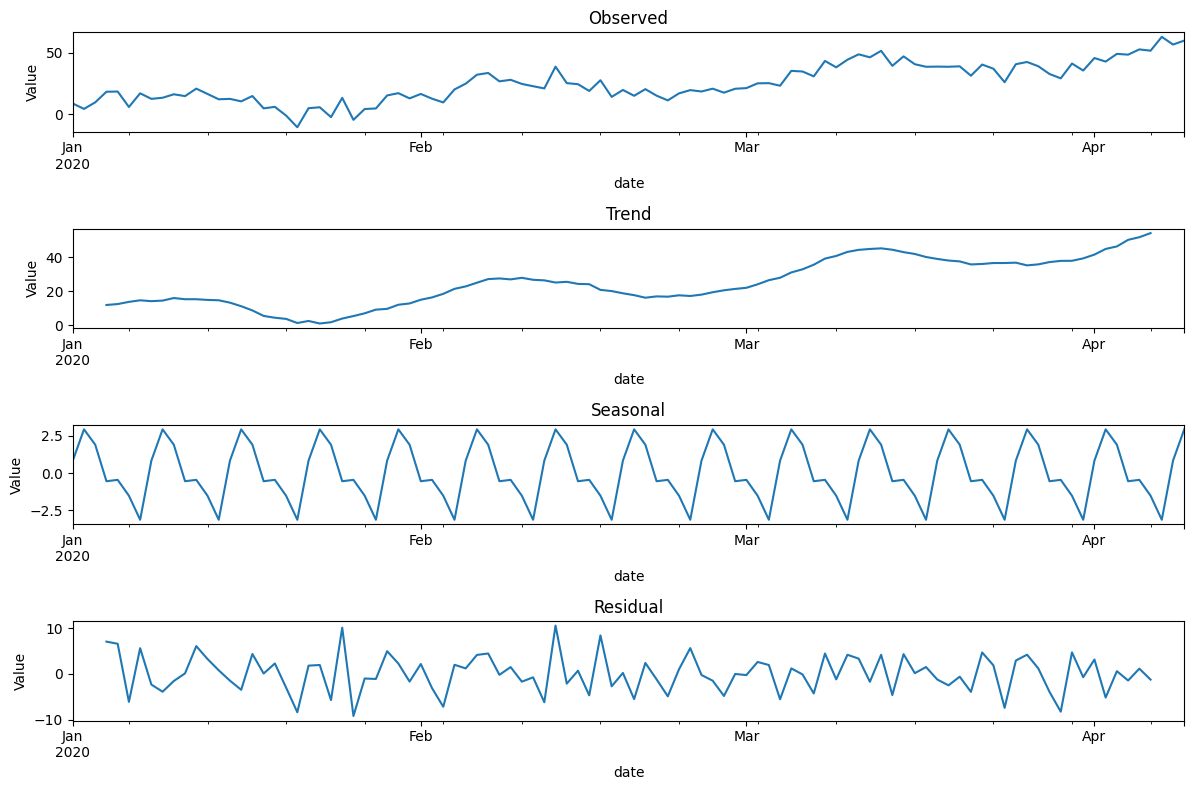

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Generate a sample time series data
np.random.seed(0)
time = np.arange(0, 100, 1)
trend = 0.5 * time
seasonality = 10 * np.sin(0.2 * time)
residual = np.random.normal(loc=0, scale=5, size=len(time))
series = trend + seasonality + residual

# Convert the series to a DataFrame
df = pd.DataFrame({
    'date': pd.date_range(start='2020-01-01', periods=len(time), freq='D'),
    'value': series
})
df.set_index('date', inplace=True)

# Decompose the time series
result = seasonal_decompose(df['value'], model='additive')
# try here using model='multiplicative'

# Plot the decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8))
result.observed.plot(ax=ax1)
ax1.set(title='Observed', ylabel='Value')
result.trend.plot(ax=ax2)
ax2.set(title='Trend', ylabel='Value')
result.seasonal.plot(ax=ax3)
ax3.set(title='Seasonal', ylabel='Value')
result.resid.plot(ax=ax4)
ax4.set(title='Residual', ylabel='Value')
plt.tight_layout()
plt.show()



A sample time series data is generated with a trend, seasonality, and random residuals.
This time series is then converted into a pandas DataFrame.
The `seasonal_decompose` function from the `statsmodels` library is used to decompose the time series into its trend, seasonality, and residual components using the additive model.
The observed series, trend, seasonality, and residuals are then plotted.
From the plots, you can see:

* The Observed plot shows the original time series.
* The Trend plot depicts the general upward movement over time.
* The Seasonal plot highlights the repeating pattern in the data.
* The Residual plot shows the noise or unexplained variation in the time series.

In [ ]:
# Check out the documentation of seasonal decompose
?seasonal_decompose

Let's dive into some real-world examples where additive and multiplicative decomposition would be more appropriate:

### 1. Additive Decomposition:

**Example: Monthly Sales of a Small Business**

Imagine a small business that has been in operation for several years, selling a product that doesn't see a change in demand intensity throughout the year, irrespective of the scale of the business. The sales figures might show:

- A **trend** of slowly increasing sales as the business grows and gains more customers.
- **Seasonal** patterns where there might be spikes in sales during certain months (e.g., holidays or back-to-school seasons) and dips in others. However, the magnitude of these spikes remains relatively constant each year.
- **Residual** or irregular fluctuations that can't be attributed to the trend or seasonality.

In this scenario, the magnitude of the seasonal spikes doesn't grow proportionally with the trend. The patterns add a roughly constant amount to the sales each year, making the additive model more appropriate.

### 2. Multiplicative Decomposition:

**Example: Monthly Web Traffic of a Growing Startup**

Consider a tech startup that has seen exponential growth. As its user base grows, the amount of web traffic it receives also increases significantly. The web traffic data might show:

- A **trend** of rapidly increasing traffic as more users get to know about the startup and start using its services.
- **Seasonal** patterns where there are more users during certain times of the day or certain days of the week. As the overall user base grows, the magnitude of these spikes grows as well. For instance, if there's a 10% increase in traffic every evening when users are more active, this 10% represents a larger absolute number of users as the overall user base grows.
- **Residual** or irregular fluctuations due to unexpected events or outages.

In this case, the seasonal patterns grow in proportion to the trend. The increase in traffic during peak times is a percentage of the total traffic, making the multiplicative model more fitting.

---

It's worth noting that while these examples illustrate typical scenarios, the choice between additive and multiplicative decomposition should be based on analyzing the data and understanding its characteristics. Visualizing the data, examining its patterns, and testing both decomposition methods can help in making an informed decision.

## Exercises

1. Change the synthetic time series from additive to multiplicative. Try fitting both an additive and a multiplicative model to it.



2. Decompose the airPassengers time series. Is it better explained with an additive or multiplicative model? How would you measure this?

```python
# Access the data
pd.read_csv('https://raw.githubusercontent.com/andandandand/time-series-dsr/main/time_series_data/airPassengers.csv')
```